In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel("/content/drive/MyDrive/ExcelData/train.xlsx")
# df1 = pd.read_excel("/content/drive/MyDrive/ExcelData/test.xlsx")

Mounted at /content/drive


Accuracy for LR is: 87.76978417266187
Confusion Matrix:


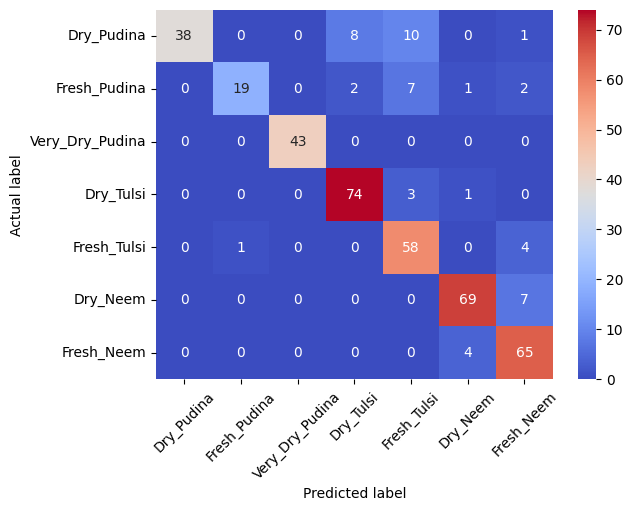

[0.89482471 0.95325543 0.90984975]
Avg : 0.9193099610461881
Time Taken: 0.16143165900000156 sec


In [2]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import time


# Extract the hyperspectral data (excluding the last column) and labels (last column)
hyperspectral_data = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values
# print(set(labels))

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

X = hyperspectral_data
Y = encoded_labels

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

digits = load_digits()

# Splitting the data test into train 70% and test 30%.
# x_train, y_train are training data and labels respectively
# x_test, y_test are testing data and labels respectively
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=4)

start = time.perf_counter()

# Making the logistic regression model
logistic_model = LogisticRegression(solver='liblinear',multi_class='ovr',max_iter = 1000)

# Training the model on the training data and labels
logistic_model.fit(x_train, y_train)

end = time.perf_counter()

# Using the model to predict the labels of the test data
y_pred = logistic_model.predict(x_test)

# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for LR is:",accuracy)

#Beautiful Matrix
y_test = label_encoder.inverse_transform(y_test)
y_pred = label_encoder.inverse_transform(y_pred)
lb = ['Dry_Pudina', 'Fresh_Pudina', 'Very_Dry_Pudina', 'Dry_Tulsi', 'Fresh_Tulsi', 'Dry_Neem', 'Fresh_Neem']
confusion_mat = confusion_matrix(y_test,y_pred, labels=lb)
print("Confusion Matrix:")
sns.heatmap(
    confusion_mat,
    annot=True,
    fmt="d",
    cmap="coolwarm",
    xticklabels=lb,
    yticklabels=lb,
)
plt.xticks(rotation=45)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

# Save the trained classifier for future use
pickle.dump(logistic_model, open("cls.sav", "wb"))


#k-fold cross validation (k = 3)
score_lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)
print(score_lr)
print("Avg :",np.average(score_lr))

#Time Calculation
print('Time Taken:', end-start, 'sec')